<a href="https://colab.research.google.com/github/algo-ryth-nic/google-colab-notebooks/blob/master/AI-ML-Campus-Recruitment-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning: Classification 
Binary Classification Problem

## Our Dataset

[Kaggle](https://www.kaggle.com/benroshan/factors-affecting-campus-placement)

This data set consists of Placement data of students in a "Jain University Bangalore". It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! mkdir ~/.kaggle
! cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d benroshan/factors-affecting-campus-placement
! unzip /content/factors-affecting-campus-placement.zip

  0% 0.00/4.51k [00:00<?, ?B/s]
100% 4.51k/4.51k [00:00<00:00, 7.30MB/s]
Archive:  /content/factors-affecting-campus-placement.zip
  inflating: Placement_Data_Full_Class.csv  


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/Placement_Data_Full_Class.csv', index_col = 'sl_no')
df.head(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


**Data Dictionary**:
1. gender = gender (Male= 'M', Felmale='F')
2. ssc_p = Secondary Education percentage- 10th Grade
3. ssc_b = Board of Education ('Central'/ 'Others')
4. hsc_p = Higher Secondary Education percentage- 12th Grade
5. hsc_b = Board of Education (Central/ Others)
6. hsc_s = Specialization in Higher Secondary Education
7. degree_p = Degree Percentage
8. degree_t = Degree Type
9. workex = work experience
10. etest_p = Employability test percentage (conducted by college)
11. specialisation = Post Graduation(MBA) Specialization (Mkt&HR/Mkt&HR)
12. mba_p = MBA percentage
13. status [**Target**] = Status of placement (Placed/Not placed)
14. salary = Salary offered by corporate to candidates
15. sl_no = Serial Number

## EDA

In [ ]:
# number of rows and columns
df.shape

(215, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


In [ ]:
# number of missing values in 'salary'
salary_na_count = df['salary'].isna().sum()
print(f'Salary Nan Count: {salary_na_count} | {salary_na_count/df.shape[0]:.2%}')

Salary Nan Count: 67 | 31.16%


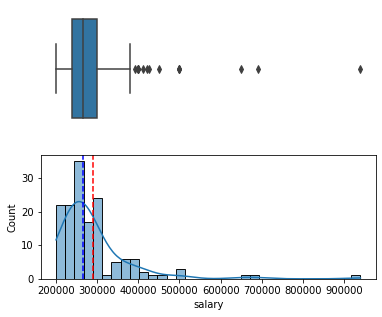

In [ ]:
# distribution of 'salary' 
fig, ax = plt.subplots(2,1, figsize=(6,5))

sns.boxplot(data = df, x = 'salary', ax=ax[0])
ax[0].axis('off')
sns.histplot(df['salary'], kde=True, ax=ax[1]);
plt.axvline(x = df['salary'].mean(), linestyle='--', c='r');
plt.axvline(x = df['salary'].median(), linestyle='--', c='b');

In [ ]:
# value count vs median value
print(f"Median: {df['salary'].median()}")
df['salary'].value_counts().head(3)

Median: 265000.0


300000.0    22
250000.0    18
240000.0    15
Name: salary, dtype: int64

In [ ]:
# replacing nan values with its median
df['salary'] = df['salary'].replace(np.nan, df['salary'].median())

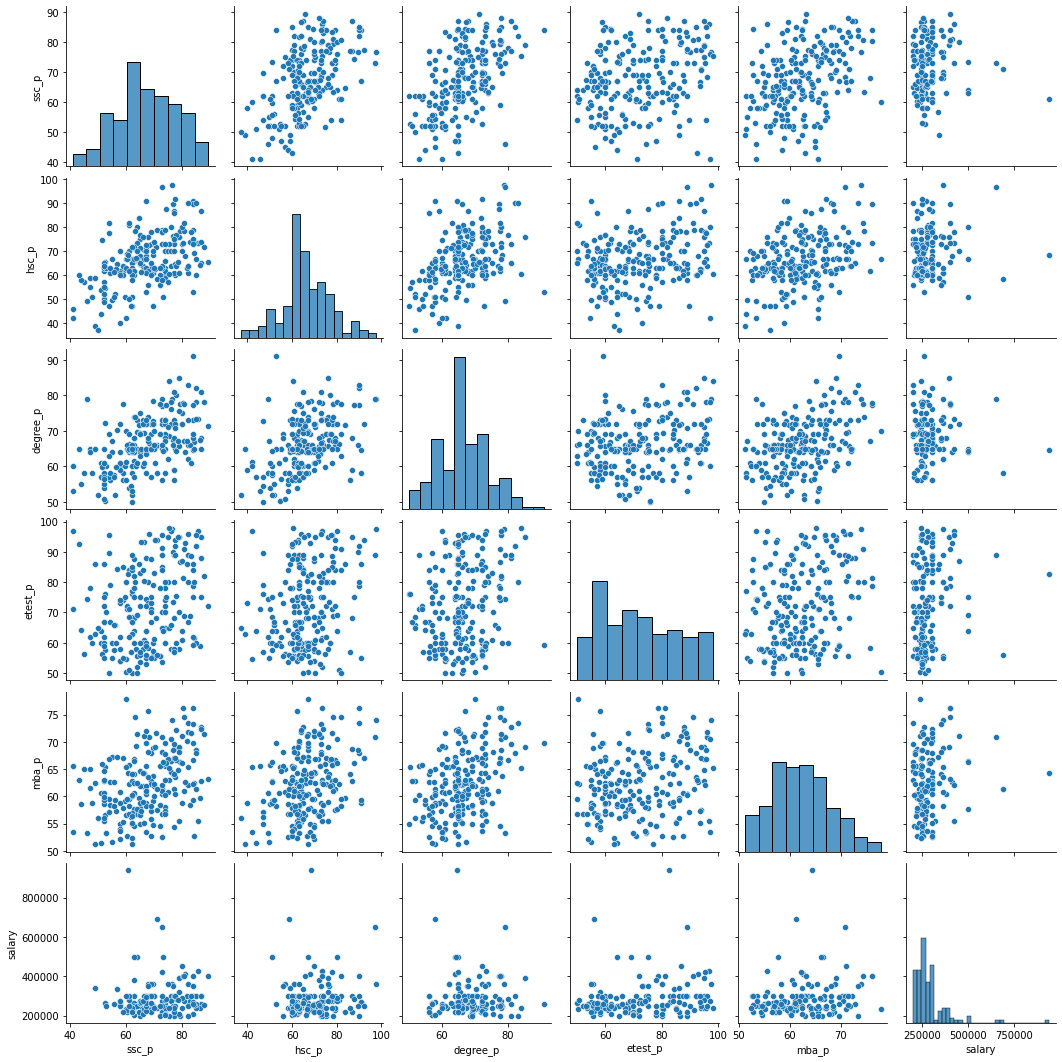

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df);

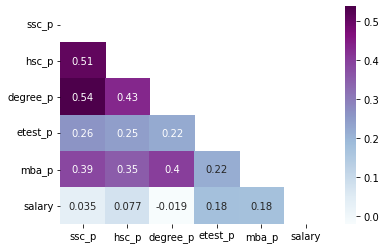

In [ ]:
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True, cmap = 'BuPu', mask=mask);

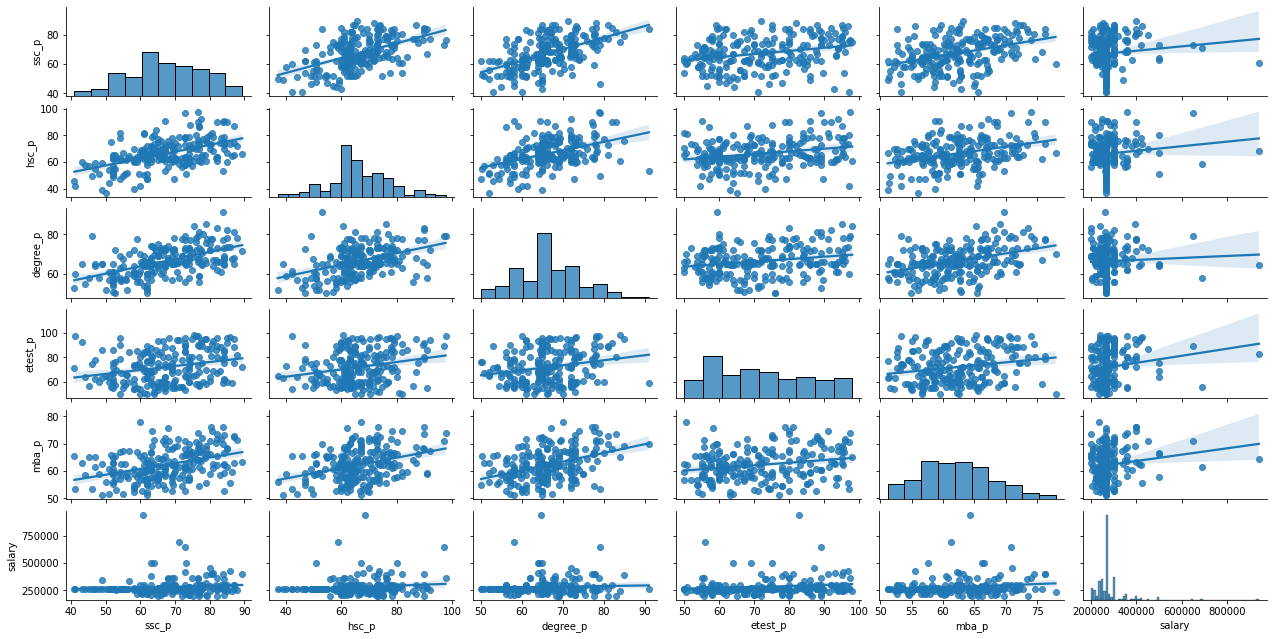

In [ ]:
sns.pairplot(df, kind='reg', height=1.5, aspect=1.8);

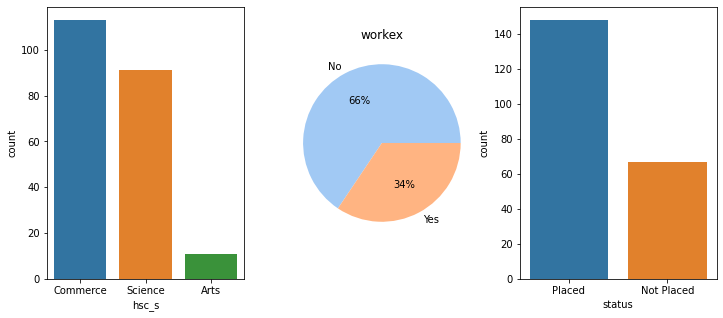

In [ ]:
# visualizing some categorical variables 
fig, ax = plt.subplots(1,3, figsize=(12,5))
sns.countplot(data =df, x='hsc_s', ax=ax[0]);
ax[1].pie(x=df['workex'].value_counts(), labels=['No', 'Yes'], colors=sns.color_palette('pastel')[0:2], autopct='%.0f%%');
ax[1].set_title('workex')
sns.countplot(data= df, x='status', ax=ax[2]);

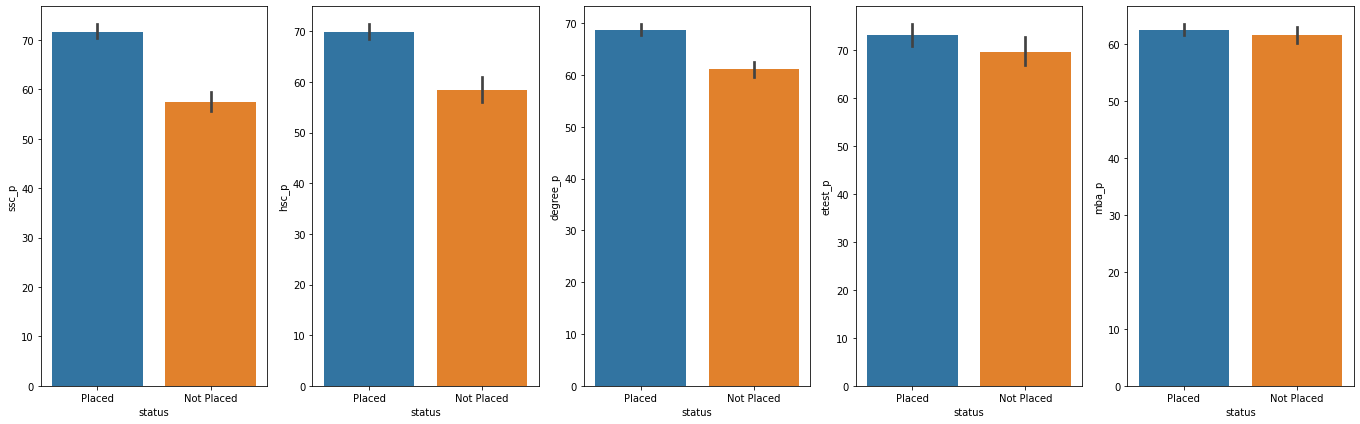

In [ ]:
# Significance of Marks
mark_col = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
fig, ax = plt.subplots(1,5, figsize=(19,6))

for idx, axis in enumerate(ax):
  sns.barplot(data=df, x='status', y=mark_col[idx], ax=axis)
plt.tight_layout()

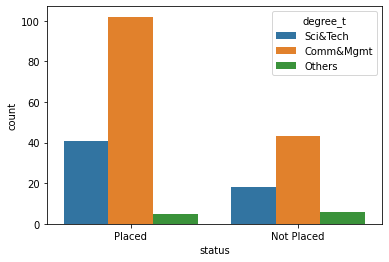

In [ ]:
# degree type matters?
sns.countplot(data = df, x = 'status', hue='degree_t');

## Data Preprocessing

In [ ]:
# encoding ordinal/binary categorical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['ssc_b', 'hsc_b', 'workex', 'specialisation', 'status']
for c in cols:
  df[c] = le.fit_transform(df[c])
df.head(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
2,M,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
3,M,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
4,M,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,265000.0
5,M,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [ ]:
# one hot encoding (non ordinal) 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(dtype=int)
encoded = ohe.fit_transform(df[['gender', 'hsc_s', 'degree_t']])
df = df.join(pd.DataFrame.sparse.from_spmatrix(
    encoded, 
    index= df.index, 
    columns= np.hstack(ohe.categories_))
  ).drop(['gender', 'hsc_s', 'degree_t'], axis=1)

df.head(5)

,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,F,M,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
sl_no,,,,,,,,,,,,,,,,,,,
1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,270000.0,0,1,0,1,0,0,0,1
2,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,200000.0,0,1,0,0,1,0,0,1
3,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,250000.0,0,1,1,0,0,1,0,0
4,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,265000.0,0,1,0,0,1,0,0,1
5,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,425000.0,0,1,0,1,0,1,0,0


In [ ]:
df.shape

(215, 19)

In [ ]:
# Splitting the data
X = df.drop('status', axis=1)
y = df['status']

## Model Training

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

lr = LogisticRegression(
    penalty='l1',
    C=0.1, 
    solver='liblinear'
)

from sklearn.model_selection import cross_val_score
# cross_val_score(lr, X,y, cv=7)
y_pred = cross_val_predict(lr, X, y, cv=7)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse co

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f'Accuracy: {accuracy_score(y, y_pred):.2%}')
print(f'Precision: {precision_score(y, y_pred):.2%}')
print(f'Recall: {recall_score(y, y_pred):.2%}')
print(f'f1: {f1_score(y, y_pred):.2%}')

Accuracy: 83.72%
Precision: 85.53%
Recall: 91.89%
f1: 88.60%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.51      0.62        67
           1       0.81      0.94      0.87       148

    accuracy                           0.80       215
   macro avg       0.80      0.72      0.74       215
weighted avg       0.80      0.80      0.79       215



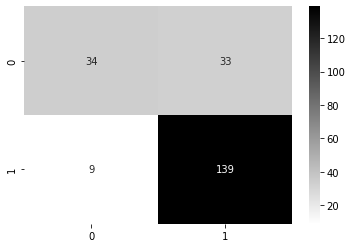

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='binary', fmt='d');

### Navie Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
gnb = GaussianNB()

y_pred = cross_val_predict(gnb, X, y, cv=5)

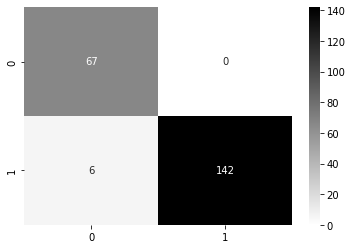

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='binary', fmt='d');

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f'Accuracy: {accuracy_score(y, y_pred):.2%}')
print(f'Precision: {precision_score(y, y_pred):.2%}')
print(f'Recall: {recall_score(y, y_pred):.2%}')
print(f'f1: {f1_score(y, y_pred):.2%}')

from sklearn.metrics import classification_report
print('\n',classification_report(y,y_pred))

Accuracy: 97.21%
Precision: 100.00%
Recall: 95.95%
f1: 97.93%

               precision    recall  f1-score   support

           0       0.92      1.00      0.96        67
           1       1.00      0.96      0.98       148

    accuracy                           0.97       215
   macro avg       0.96      0.98      0.97       215
weighted avg       0.97      0.97      0.97       215




### K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

knn_clf = KNeighborsClassifier(n_neighbors = 5)
y_pred = cross_val_predict(knn_clf, X, y, cv=5)

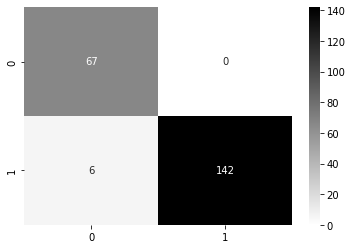

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='binary', fmt='d');

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f'Accuracy: {accuracy_score(y, y_pred):.2%}')
print(f'Precision: {precision_score(y, y_pred):.2%}')
print(f'Recall: {recall_score(y, y_pred):.2%}')
print(f'f1: {f1_score(y, y_pred):.2%}')

from sklearn.metrics import classification_report
print('\n',classification_report(y,y_pred))

Accuracy: 97.21%
Precision: 100.00%
Recall: 95.95%
f1: 97.93%

               precision    recall  f1-score   support

           0       0.92      1.00      0.96        67
           1       1.00      0.96      0.98       148

    accuracy                           0.97       215
   macro avg       0.96      0.98      0.97       215
weighted avg       0.97      0.97      0.97       215



### Decision Tree

### Random Forest